## TP2 : Classification using Linear & Quadratic Discriminant Analysis

First think of configuring your notebook :

In [1]:
import csv
# import os
from pylab import *
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt


## Reading synthetic data
Load the training and test data sets |synth_train.txt| and
|synth_test.txt| already used for Knn. Targets belong to {1,2} and entries belong to R^2.
We have 100 training data samples and 200 test samples.

* the 1st column contains the label of the class the sample, 
* columns 2 & 3 contain the coordinates of each sample in 2D.

On charge les données du training set

In [2]:
# Chargement des données
train = np.loadtxt('synth_train.txt')

# On prend les labels
class_train = train[:,0]
# On prend les coordonnées
x_train = train[:,1:]
N_train = train.shape[0]


On peut faire un affichage pour avoir une visualisation de nos données d'entrainement

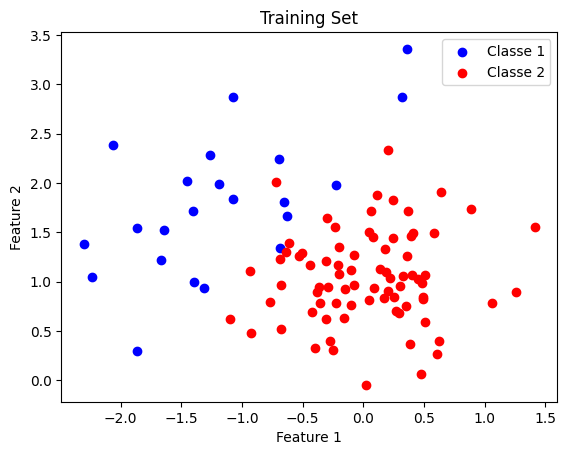

In [3]:
# Affichage de l'ensemble d'entraînement

# On sépare les échantillons par classe
class_1 = x_train[class_train == 1]
class_2 = x_train[class_train == 2]

# On affiche l'ensemble d'entraînement
plt.scatter(class_1[:,0], class_1[:,1], c='blue', label='Classe 1')
plt.scatter(class_2[:,0], class_2[:,1], c='red', label='Classe 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Set')
plt.legend()

plt.savefig("img/training_set.png")
plt.show()

On observe bien que les deux classes sont distinctes, il est donc cohérent d'essayer de construire un modèle de classification

On charge les données du test set

In [4]:
test = np.loadtxt('synth_test.txt')

# On définit nos deux classes 1 et 2
class_test_1 = test[test[:,0]==1]
class_test_2 = test[test[:,0]==2]

# On prend les coordonnées
x_test = test[:,1:]
N_test = test.shape[0]

On peut aussi faire un affichage pour avoir une visualisation de nos données de test

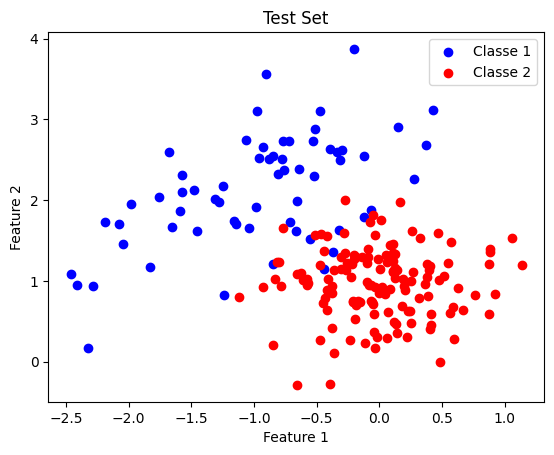

In [5]:
# On affiche le test set pour vérifier que l'import a bien fonctionné et pour avoir une visualisation de notre set de test
plt.scatter(class_test_1[:,1], class_test_1[:,2], c='blue', label='Classe 1')
plt.scatter(class_test_2[:,1], class_test_2[:,2], c='red', label='Classe 2')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Set')
plt.legend()
plt.savefig("img/test_set.png")
plt.show()

Nos données ressemblent bien aux données d'entrainement. Nous pouvons maintenant commencer à concevoir nos modèles de classification

## Recall about the main steps of discriminant analysis:
* estimation of weights `pi_1` and `pi_2` for each class,
* estimation of empirical means `mu_1` and `mu_2` for each class, 
* estimation of empirical covariance matrices  `sigma_1` and `sigma_2`,
* computation of the common averaged covariance `sigma` (average of intra-class covariances),
* computation of log-probabilities of belonging to each class,
* decision of classification,
* display results.


## TO DO : linear & quadratic discriminant analysis (LDA & QDA)
1. Implement a classifier using LDA of the data set. 
2. Then implement QDA classification.
3. In each case (LDA & QDA) show the decision boundary and
compute the error rate respectively for the training set and the test set. 
4. Compare and comment on your results with LDA and QDA.
5. You may also compare your results to K nearest neighbours.

_Indication 1 : matrices `sigma` are of size 2x2.
More generally, be careful of the sizes of vectors and matrices you
manipulate._

_Indication 2 : to display the regions of decision, you may use:_


In [6]:
#Question 1

#Découpage des data en deux tableaux, en fonction de la classe

train_features = train[:, 1:]
test_features = test[:, 1:]

train_labels = train[:, 0]
test_labels = test[:, 0]

N = len(train)
N1 = np.sum(train[:, 0] == 1)
N2 = N - N1

pi_1 = N1 / N
pi_2 = 1 - pi_1

mu_1 = np.mean(train[train[:,0] == 1][:, 1:], axis=0)
mu_2 = np.mean(train[train[:,0] == 2][:, 1:], axis=0)

sigma_1 = np.cov(train[train[:, 0] == 1][:, 1:], rowvar=False)
sigma_2 = np.cov(train[train[:, 0] == 2][:, 1:], rowvar=False)

sigma = 1/N *(N1 * sigma_1 + N2 * sigma_2)

def lda_classifier(x):
    d1 = np.dot(np.dot(x.T, np.linalg.inv(sigma)), mu_1) + np.log(pi_1) - 0.5 * np.dot(np.dot(mu_1.T, np.linalg.inv(sigma)), mu_1)
    d2 = np.dot(np.dot(x.T, np.linalg.inv(sigma)), mu_2) + np.log(pi_2) - 0.5 * np.dot(np.dot(mu_2.T, np.linalg.inv(sigma)), mu_2)
    return 1 if d1 > d2 else 2



In [7]:
def qda_classifier(x):
    d1 = -0.5 * np.log(np.linalg.det(sigma_1)) - 0.5 * np.dot(np.dot((x - mu_1).T, np.linalg.inv(sigma_1)), (x - mu_1)) + np.log(pi_1)
    d2 = -0.5 * np.log(np.linalg.det(sigma_2)) - 0.5 * np.dot(np.dot((x - mu_2).T, np.linalg.inv(sigma_2)), (x - mu_2)) + np.log(pi_2)
    return 1 if d1 > d2 else 2

In [8]:
Nx1=100 # number of samples for display
Nx2=100
x1=np.linspace(-2.5,1.5,Nx1)  # sampling of the x1 axis 
x2=np.linspace(-0.5,4,Nx2)  # sampling of the x2 axis
[X1,X2]=np.meshgrid(x1,x2)  
x=np.hstack((X1.flatten('F'),X2.flatten('F'))) # list of the coordinates of points on the grid
N = size(x,axis=0)

# Then compute the sampled prediction class_L for each couple (X1,X2)

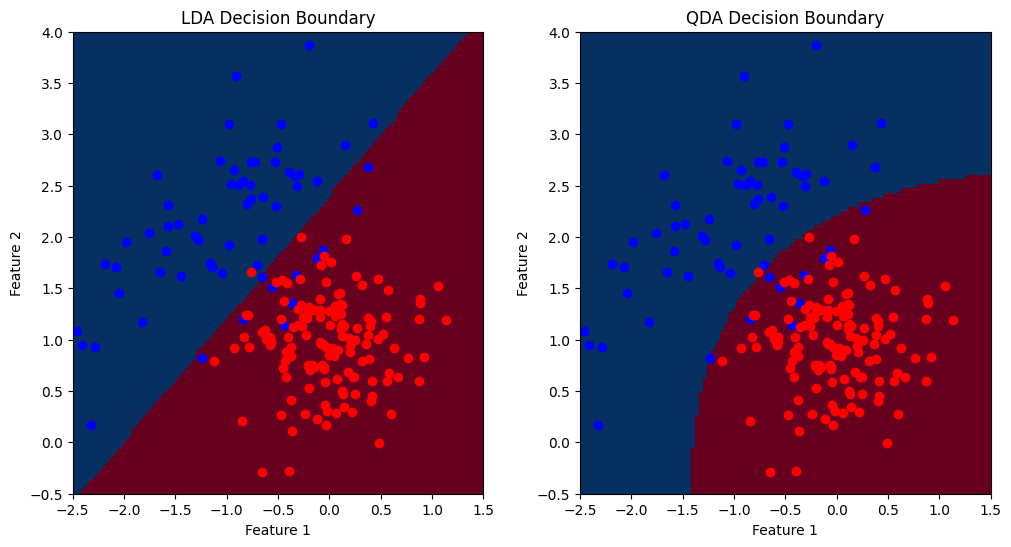

Taux d'erreur d'entraînement (LDA) : 0.27485 %
Taux d'erreur d'entraînement (QDA) : 0.2982 %
Taux d'erreur de test (LDA) : 0.335 %
Taux d'erreur de test (QDA) : 0.44 %


In [9]:
# For graphical representation  use code below for instance :
# Initialize arrays for class predictions
class_L_lda = np.zeros((Nx2, Nx1))
class_L_qda = np.zeros((Nx2, Nx1))

# Fill in class predictions for LDA
for i in range(Nx2):
    for j in range(Nx1):
        class_L_lda[i, j] = lda_classifier(np.array([x1[j], x2[i]]))

# Fill in class predictions for QDA
for i in range(Nx2):
    for j in range(Nx1):
        class_L_qda[i, j] = qda_classifier(np.array([x1[j], x2[i]]))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(class_L_lda, extent=(np.min(x1), np.max(x1), np.min(x2), np.max(x2)), origin='lower', cmap=plt.cm.RdBu_r)
plt.scatter(class_test_1[:,1], class_test_1[:,2], c='blue', label='Classe 1')
plt.scatter(class_test_2[:,1], class_test_2[:,2], c='red', label='Classe 2')
plt.title("LDA Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.imshow(class_L_qda, extent=(np.min(x1), np.max(x1), np.min(x2), np.max(x2)), origin='lower', cmap=plt.cm.RdBu_r)
plt.scatter(class_test_1[:,1], class_test_1[:,2], c='blue', label='Classe 1')
plt.scatter(class_test_2[:,1], class_test_2[:,2], c='red', label='Classe 2')
plt.title("QDA Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

# Calcul du taux d'erreur d'entraînement pour LDA
lda_training_errors = np.sum(train_labels != class_L_lda)
lda_training_error_rate = lda_training_errors / N

# Calcul du taux d'erreur d'entraînement pour QDA
qda_training_errors = np.sum(train_labels != class_L_qda)
qda_training_error_rate = qda_training_errors / N

print("Taux d'erreur d'entraînement (LDA) :", lda_training_error_rate, "%")
print("Taux d'erreur d'entraînement (QDA) :", qda_training_error_rate, "%")

# Créer un tableau de prédictions de classe pour LDA et QDA
class_L_lda_flat = class_L_lda.flatten()
class_L_qda_flat = class_L_qda.flatten()

# Calculer le taux d'erreur de test pour LDA
lda_test_errors = np.sum(test_labels != class_L_lda_flat[:len(test_labels)])
lda_test_error_rate = lda_test_errors / len(test_labels)

# Calculer le taux d'erreur de test pour QDA
qda_test_errors = np.sum(test_labels != class_L_qda_flat[:len(test_labels)])
qda_test_error_rate = qda_test_errors / len(test_labels)

print("Taux d'erreur de test (LDA) :", lda_test_error_rate, "%")
print("Taux d'erreur de test (QDA) :", qda_test_error_rate, "%")



## TO DO : LDA & QDA using scikit-learn module

The module `scikit-learn` is dedicated to machine learning algorithms. Many of them are available in a simple manner. For LDA and QDA, have a look at the tutorial available at http://scikit-learn.org/stable/modules/lda_qda.html 

**Warning** : you may have a critical view of the way LDA and QDA are illustrated in the proposed example...




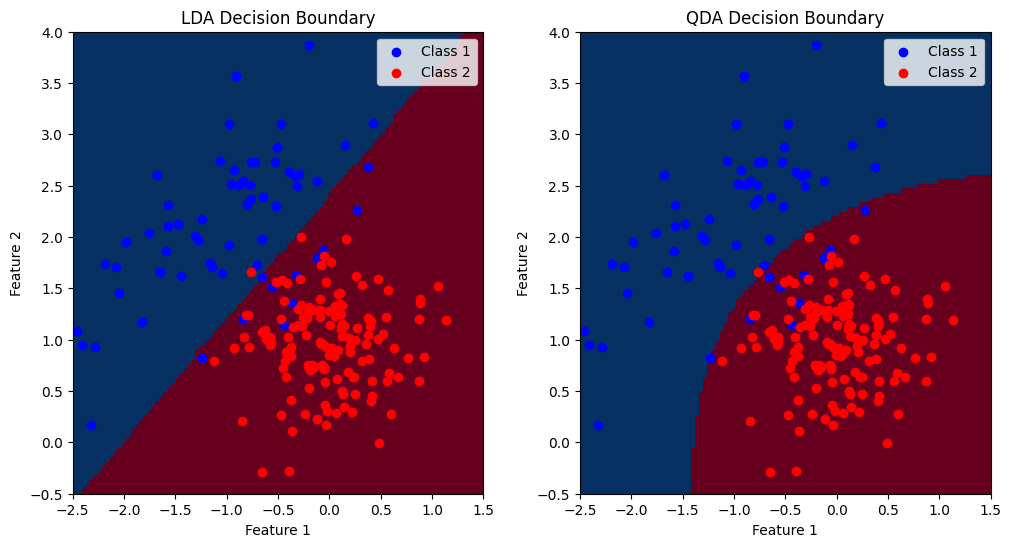

LDA Accuracy: 0.94
LDA Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.84      0.90        62
         2.0       0.93      0.99      0.96       138

    accuracy                           0.94       200
   macro avg       0.96      0.92      0.93       200
weighted avg       0.95      0.94      0.94       200

QDA Accuracy: 0.95
QDA Classification Report:
               precision    recall  f1-score   support

         1.0       0.98      0.85      0.91        62
         2.0       0.94      0.99      0.96       138

    accuracy                           0.95       200
   macro avg       0.96      0.92      0.94       200
weighted avg       0.95      0.95      0.95       200



In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Create instances of the LDA and QDA classifiers
lda_classifier = LinearDiscriminantAnalysis()
qda_classifier = QuadraticDiscriminantAnalysis()

# Fit the classifiers to your training data
lda_classifier.fit(train_features, train_labels)
qda_classifier.fit(train_features, train_labels)

lda_predictions = lda_classifier.predict(test_features)
qda_predictions = qda_classifier.predict(test_features)

grid_points = np.c_[X1.ravel(), X2.ravel()]

# Get predictions for LDA and QDA
lda_grid_predictions = lda_classifier.predict(grid_points)
qda_grid_predictions = qda_classifier.predict(grid_points)

# Reshape the predictions for plotting
lda_grid_predictions = lda_grid_predictions.reshape(X1.shape)
qda_grid_predictions = qda_grid_predictions.reshape(X2.shape)

# Create subplots for LDA and QDA decision boundaries
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(lda_grid_predictions, extent=(np.min(x1), np.max(x1), np.min(x2), np.max(x2)), origin='lower', cmap=plt.cm.RdBu_r)
plt.scatter(class_test_1[:, 1], class_test_1[:, 2], c='blue', label='Class 1')
plt.scatter(class_test_2[:, 1], class_test_2[:, 2], c='red', label='Class 2')
plt.title("LDA Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.subplot(1, 2, 2)
plt.imshow(qda_grid_predictions, extent=(np.min(x1), np.max(x1), np.min(x2), np.max(x2)), origin='lower', cmap=plt.cm.RdBu_r)
plt.scatter(class_test_1[:, 1], class_test_1[:, 2], c='blue', label='Class 1')
plt.scatter(class_test_2[:, 1], class_test_2[:, 2], c='red', label='Class 2')
plt.title("QDA Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.show()
# Evaluate the performance of the classifiers
lda_accuracy = accuracy_score(test_labels, lda_predictions)
lda_report = classification_report(test_labels, lda_predictions)

qda_accuracy = accuracy_score(test_labels, qda_predictions)
qda_report = classification_report(test_labels, qda_predictions)

print("LDA Accuracy: {:.2f}".format(lda_accuracy))
print("LDA Classification Report:\n", lda_report)

print("QDA Accuracy: {:.2f}".format(qda_accuracy))
print("QDA Classification Report:\n", qda_report)
